In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [4]:
df.shape

(400, 5)

In [5]:
df.describe(include = 'all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


# Preprocessing

1. Missing Values
2. Duplicates
3. TypeCasting
4. Zero Variance
5. Outlier treatment

## 1. Missing Values

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## 2. Duplicates

In [8]:
duplicate = df.duplicated()
sum(duplicate)

0

## 3. TypeCasting

In [9]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

## 4. Zero Variance

In [11]:
df['Age'].var()
df['Age'].var() == 0
df['Age'].var(axis = 0) == 0

False

## 5. Outlier Treatment

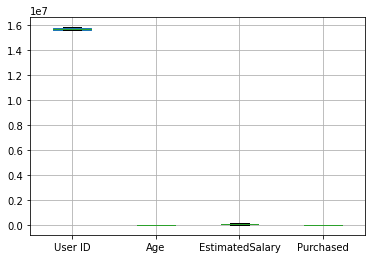

In [12]:
df.boxplot(figsize = (10, 20))
plt.show()

<Axes: >

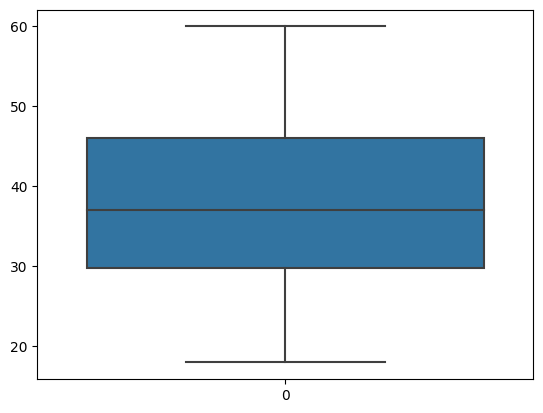

In [13]:
sns.boxplot(df.Age)

<Axes: >

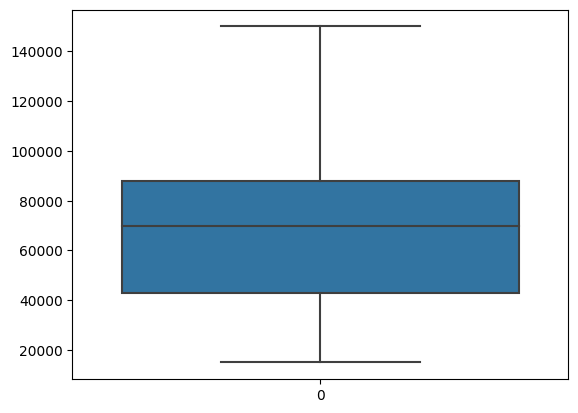

In [14]:
sns.boxplot(df.EstimatedSalary)

<Axes: >

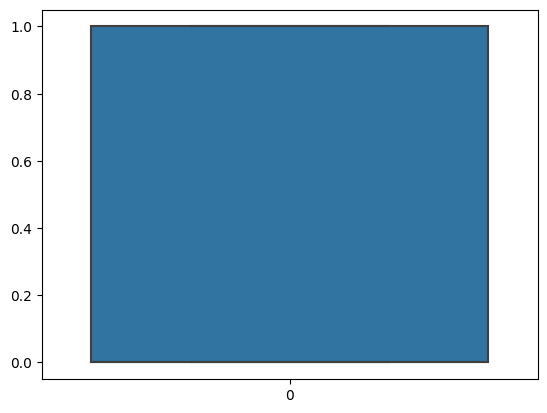

In [15]:
sns.boxplot(df.Purchased)

# Visualization (DA -2)

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Purchased'}>]], dtype=object)

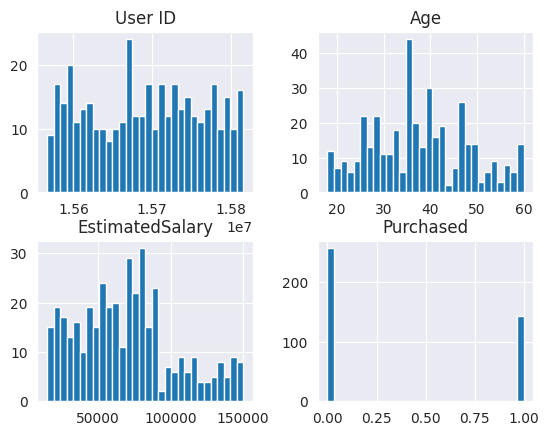

In [16]:
sns.set_style('darkgrid')
df.hist(bins = 30)

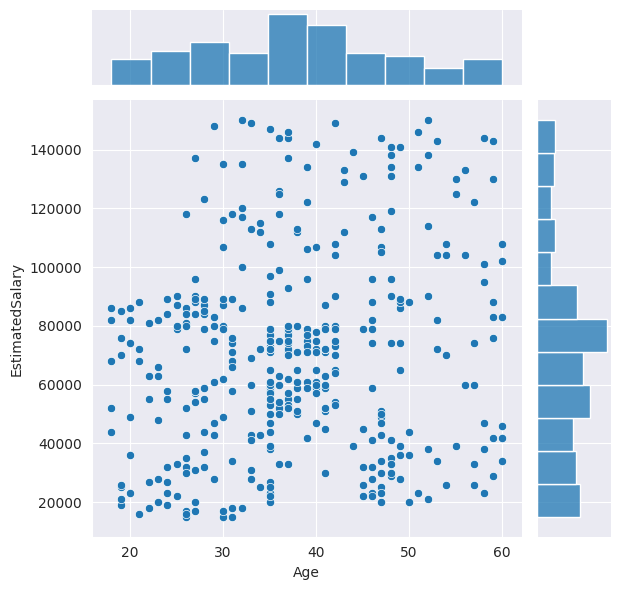

In [17]:
sns.jointplot(x = 'Age', y = 'EstimatedSalary', data = df)

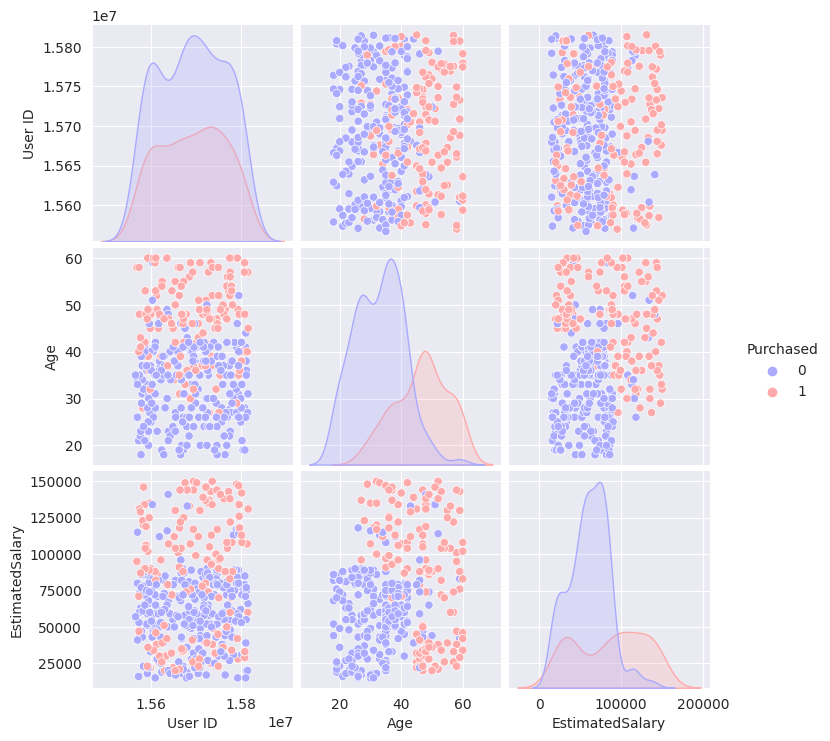

In [18]:
sns.pairplot(df, hue = 'Purchased', palette = 'bwr')

# Logistic Regression

In [19]:
# Split the Dataset
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [20]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Model Training

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

## Fitting the model by the Training data

In [24]:
lRegression = LogisticRegression()

In [25]:
lRegression.fit(x_train, y_train) # model is being trained

LogisticRegression()

## Train Accuracy

In [26]:
lRegression.score(x_train, y_train)

0.621875

## Test Accuracy

In [27]:
# Make Predictions on Test Data
y_pred = lRegression.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
mse = mean_squared_error(y_test, y_pred)
mse

0.275

In [29]:
r2 = r2_score(y_test, y_pred)
r2

-0.37931034482758585

In [30]:
report = classification_report(y_test, y_pred)
report

/home/sanket/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanket/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanket/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.72      1.00      0.84        58\n           1       0.00      0.00      0.00        22\n\n    accuracy                           0.73        80\n   macro avg       0.36      0.50      0.42        80\nweighted avg       0.53      0.72      0.61        80\n'

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[58  0]
 [22  0]]
